# Data Science in Economics and Business - Class Project
In this class project, you are supposed to work with experimental data from the paper "The Many Faces of Human Sociality: Uncovering the Distribution and Stability of Social Preferences" by Bruhin, Fehr, and Schunk, published in the *Journal of the European Economic Association* 17(4): 1025-1069, 2019: https://doi.org/10.1093/jeea/jvy018

**IMPORTANT:** <br>
Please enter the matriculation number of all group members here:
1. 2493143
2. 2260326
3. 2796816

In this class project, you will use the different techniques taught in the course: data handling, data visualization, and machine learning.

First load the necessary packages. <br>
If you want to use additional libraries you can add them to the following cell:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import folium
from folium.plugins import MarkerCluster
from sklearn.preprocessing import LabelEncoder

choices_df = pd.read_csv('data/choices.csv')
subjects_df = pd.read_csv('data/subjects.csv')

The authors observe human behavior in the so-called dictator game: One player (*dictator*) receives a certain amount of money and can distribute this endowment between herself and another player (*receiver*). The decision of the dictator is implemented, and the receiver has no choice to take and must accept the dictator's decision. <br>
The authors employ a binary version of the dictator game in which the dictator can choose between two alternative allocation options *X* and *Y*. Each dictator in the experiment plays 30 of these dictator games with varying pairs of decision alternatives. <br>
All subjects in the experiment were students from the University of Zurich and the Swiss Federal Institute of Technology Zurich.

# Problem 2 - Data Visualization
#### a)
As a first type of visualization, focus on the choices and the decision scenarios. <br>
That is, use the payoffs and indicators of (dis)advantageous inequality. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

## General observations

Text(0.5, 1.0, 'Distribution of choices (X=1, Y=0)')

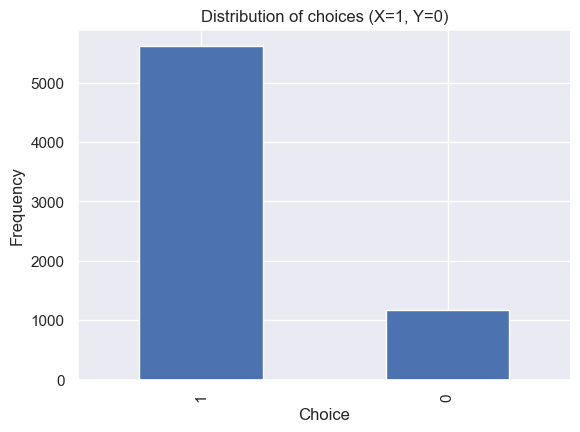

In [2]:
# Total Choices X or Y Made by Dictators
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 3)
choices_df['choice_x'].value_counts().plot(kind='bar')
plt.xlabel('Choice')
plt.ylabel('Frequency')
plt.title('Distribution of choices (X=1, Y=0)')

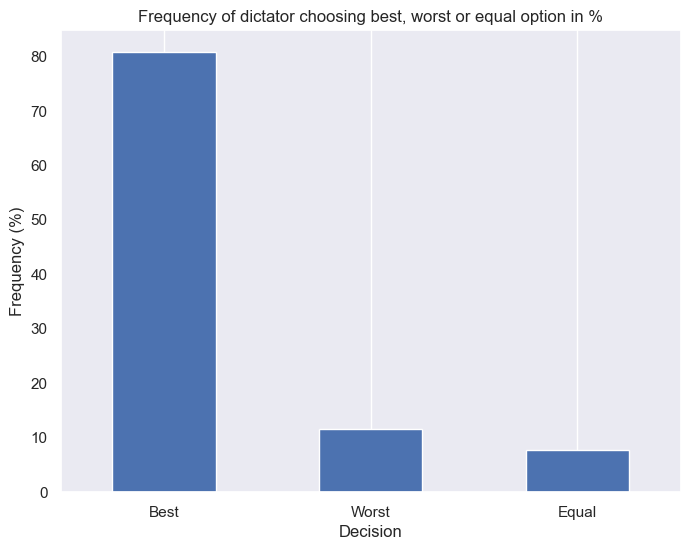

In [3]:
# Is the dictator always choosing the best option for himself?
choices_df['decision'] = choices_df.apply(
    lambda row: 'Best' if (row['self_x'] > row['self_y'] and row['choice_x'] == 1) or (row['self_y'] > row['self_x'] and row['choice_x'] == 0) else (
                'Worst' if (row['self_x'] < row['self_y'] and row['choice_x'] == 1) or (row['self_y'] < row['self_x'] and row['choice_x'] == 0) else 'Equal'),
    axis=1
)

decision_counts = choices_df['decision'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
decision_counts.plot(kind='bar')
plt.xlabel('Decision')
plt.ylabel('Frequency (%)')
plt.title('Frequency of dictator choosing best, worst or equal option in %')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### We can see that the dictator both tends to choose Option X and the stronger option for himself most of the time. Therefore we could derive that Option X appears to be more favorable towards the dictator for the analysed games.

## Analysis advantageous inequality

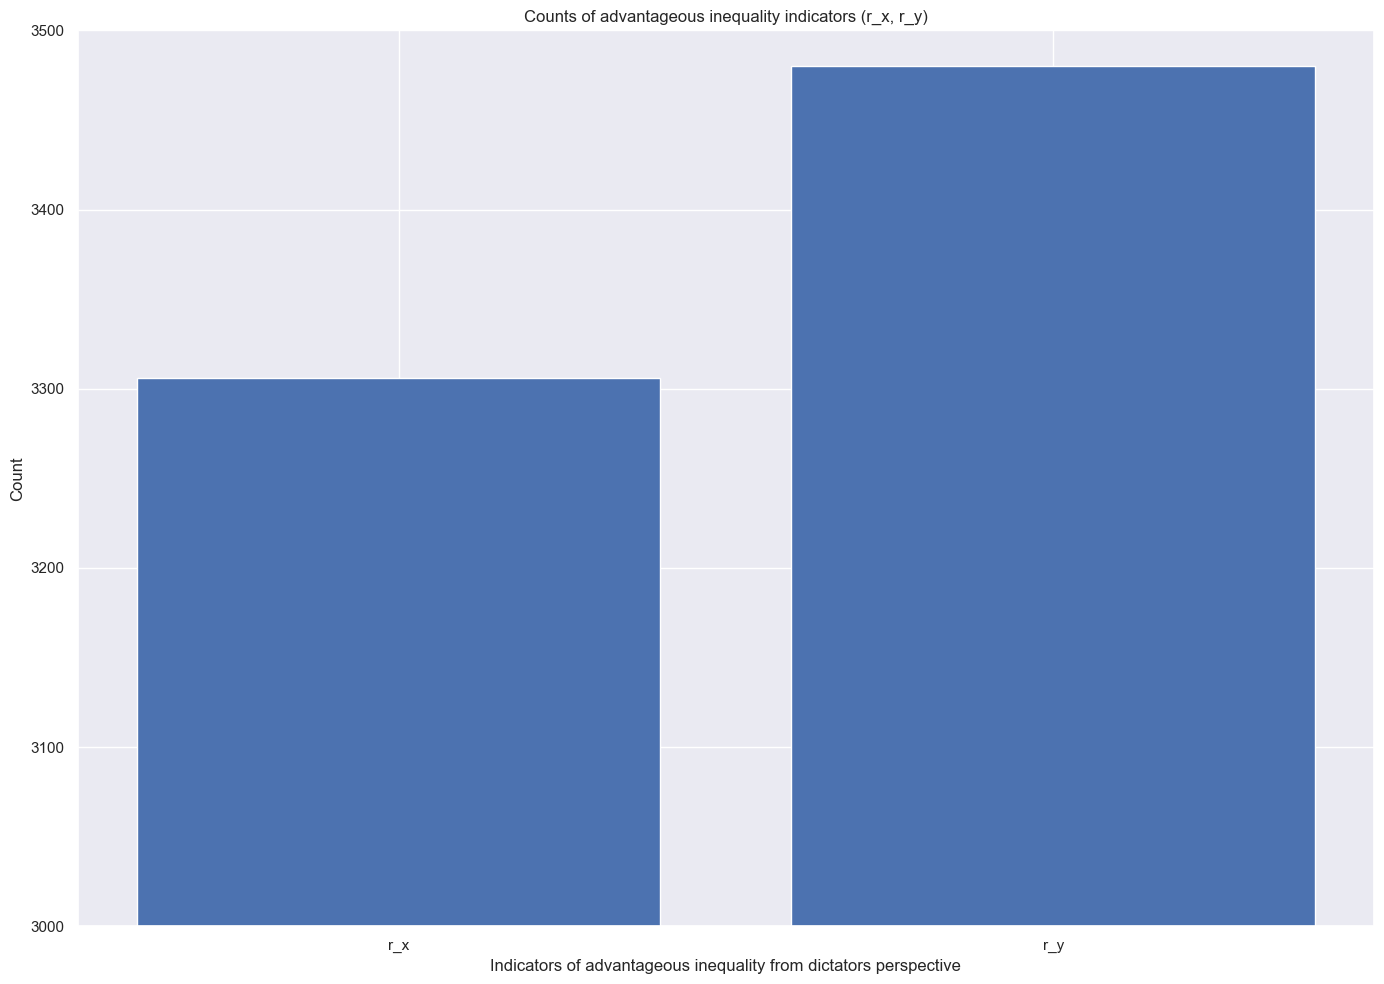

In [4]:
# Counting Indicators of Inequality (only once since s_x = 1-r_x)
# Summing the counts for r_x and r_y where they are 1
r_x_count = choices_df[choices_df['r_x'] == 1]['r_x'].count()
r_y_count = choices_df[choices_df['r_y'] == 1]['r_y'].count()

plt.figure(figsize=(14, 10))
plt.bar(['r_x', 'r_y'], [r_x_count, r_y_count], log=False)
plt.ylim(3000, 3500)
plt.xlabel('Indicators of advantageous inequality from dictators perspective')
plt.ylabel('Count')
plt.title('Counts of advantageous inequality indicators (r_x, r_y)')
plt.tight_layout()
plt.show()

### However, when looking at the advantageous inequality, we can see that for option Y the dictators payoff tends to be higher than the receivers more often.This implies that the Dictator generally values his own absolute benefit over the higher difference compared to the receiver when making a decision.

C:\Users\danny\AppData\Local\Temp\ipykernel_1700\3549402049.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_option_df['options_delta'] = best_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)
C:\Users\danny\AppData\Local\Temp\ipykernel_1700\3549402049.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_option_df['options_delta'] = best_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)


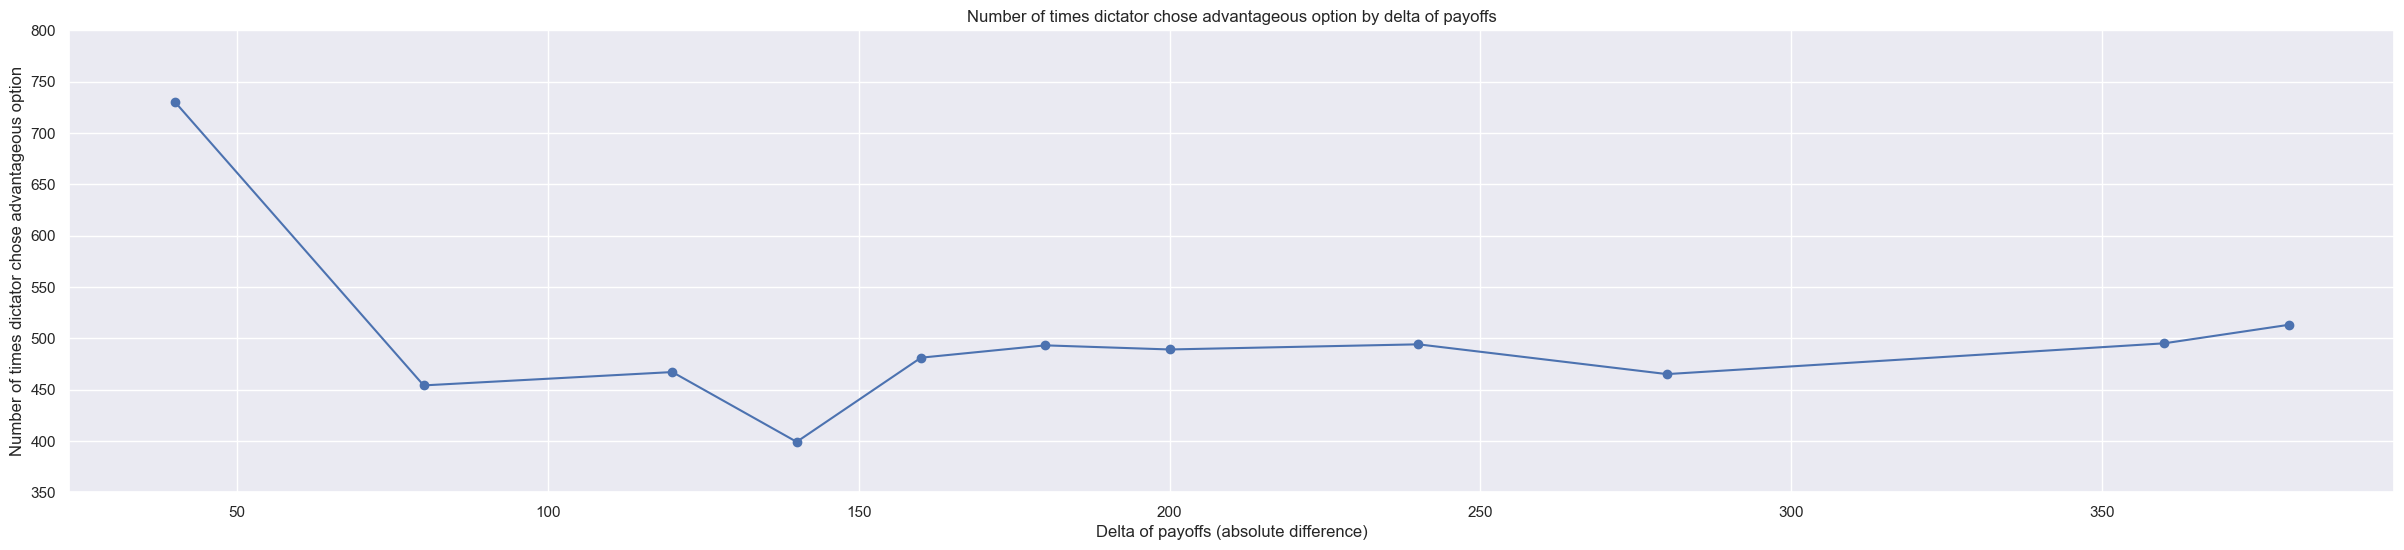

C:\Users\danny\AppData\Local\Temp\ipykernel_1700\3549402049.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_optimal_option_df['options_delta'] = non_optimal_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)
C:\Users\danny\AppData\Local\Temp\ipykernel_1700\3549402049.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_optimal_option_df['options_delta'] = non_optimal_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)


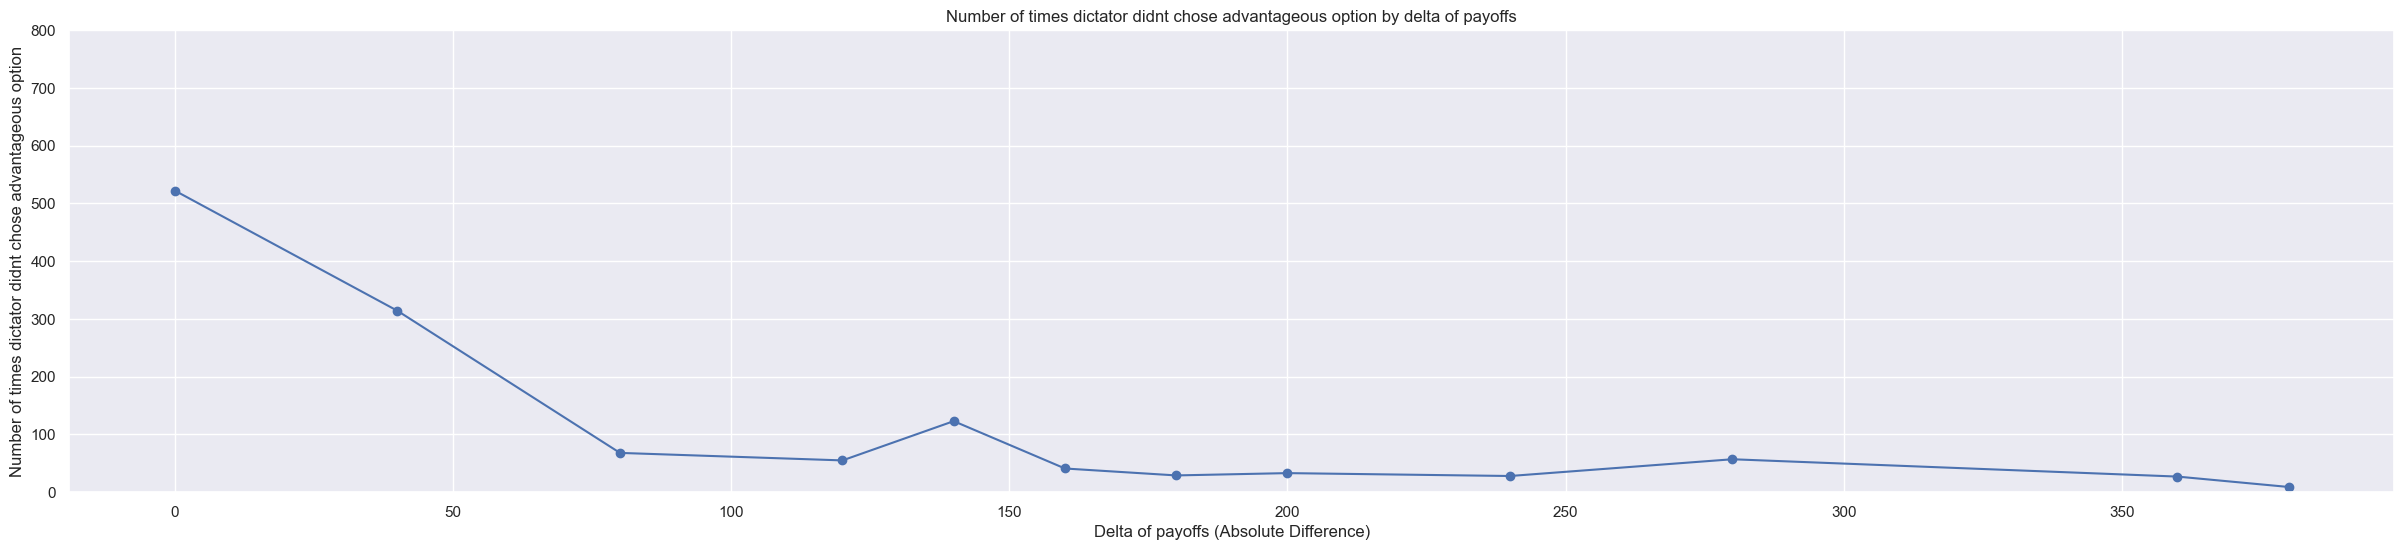

In [5]:
# Determine the dictator and receiver payoffs based on their choice
choices_df['dictator_payoff'] = choices_df.apply(lambda row: row['self_x'] if row['choice_x'] == 1 else row['self_y'], axis=1)
choices_df['receiver_payoff'] = choices_df.apply(lambda row: row['other_x'] if row['choice_x'] == 1 else row['other_y'], axis=1)

# Delta of payoffs - Analysis
# 1. Calculate delta and attach new columns to dataset
# 2. Determine if the dictator chose the best option (indicator = 1) for himself and attach indicator to dataset

# 1.
choices_df['dictator_delta'] = choices_df['self_x'] - choices_df['self_y']
choices_df['receiver_delta'] = choices_df['other_x'] - choices_df['other_y']
# 2.
choices_df['best_option_chosen'] = choices_df.apply(lambda row: 1 if (row['self_x'] > row['self_y'] and row['choice_x'] == 1) or (row['self_y'] > row['self_x'] and row['choice_x'] == 0) else 0, axis=1)

# New temporary dataset: Only where the Dictator used his priviledge to his advantage
best_option_df = choices_df[choices_df['best_option_chosen'] == 1]

# How often was the higher paying option chosen?
best_option_df['options_delta'] = best_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)
best_option_df['options_delta'] = best_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)
delta_value_counts_advantageous = best_option_df['options_delta'].value_counts().sort_index()

plt.figure(figsize=(30, 6))
plt.plot(delta_value_counts_advantageous.index, delta_value_counts_advantageous.values, marker='o')
plt.ylim(350, 800)
plt.xlabel('Delta of payoffs (absolute difference)')
plt.ylabel('Number of times dictator chose advantageous option')
plt.title('Number of times dictator chose advantageous option by delta of payoffs')
plt.grid(True)
plt.show()

# Same plot, but non-optimal decisions (both equal and worse payoffs)
non_optimal_option_df = choices_df[choices_df['best_option_chosen'] != 1]
non_optimal_option_df['options_delta'] = non_optimal_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)
non_optimal_option_df['options_delta'] = non_optimal_option_df.apply(lambda row: abs(row['self_x'] - row['self_y']), axis=1)

delta_value_counts_non_optimal = non_optimal_option_df['options_delta'].value_counts().sort_index()

plt.figure(figsize=(30, 6))
plt.plot(delta_value_counts_non_optimal.index, delta_value_counts_non_optimal.values, marker='o')
plt.ylim(0, 800)
plt.xlabel('Delta of payoffs (Absolute Difference)')
plt.ylabel('Number of times dictator didnt chose advantageous option')
plt.title('Number of times dictator didnt chose advantageous option by delta of payoffs')
plt.grid(True)
plt.show()

### Here we can see that the higher the dictators own benefit, the more likely he is to choose the advantageous option. Also, the payout appears to be roughly within a delta of >50 for the most cases.

### For non-optimal decisions it is visible that the higher the payoff is, the less the worse option gets chosen (which confirms the above observation).

### Since Option X was chosen with a higher frequency, lets look on the payoff distribution of Option X:

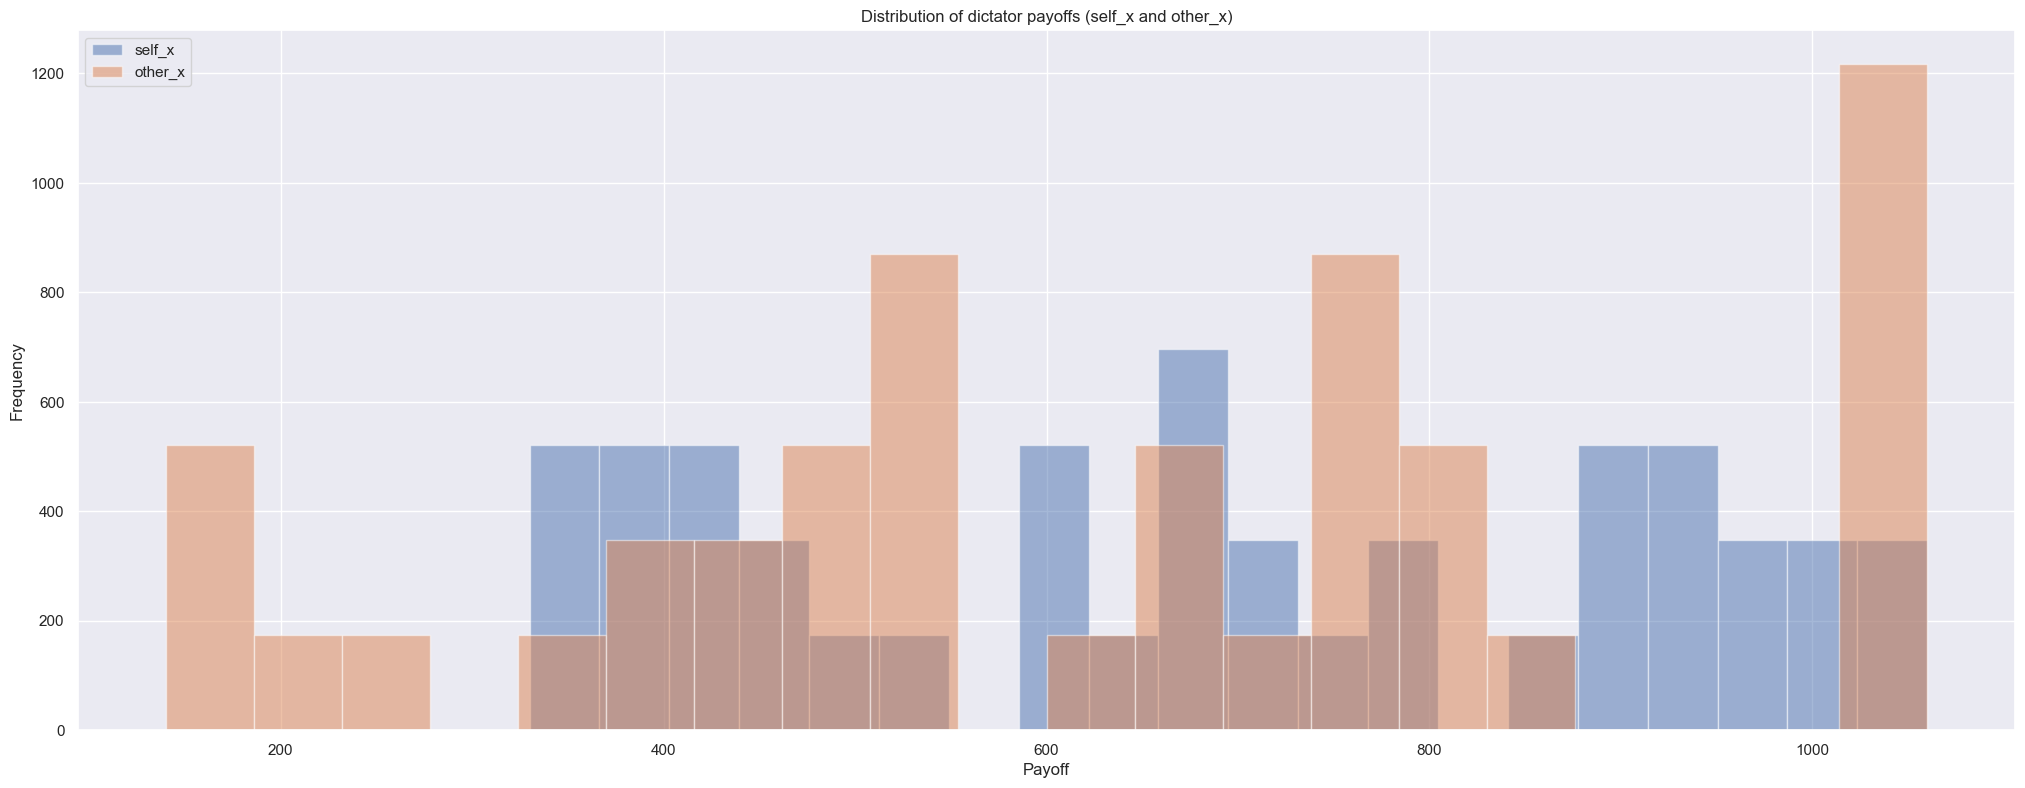

In [6]:
# Payoff Distribution
plt.figure(figsize=(55, 20))
plt.subplot(2, 2, 1)
plt.hist(choices_df['self_x'], bins=20, alpha=0.5, label='self_x')
plt.hist(choices_df['other_x'], bins=20, alpha=0.5, label='other_x')
plt.xlabel('Payoff')
plt.ylabel('Frequency')
plt.title('Distribution of dictator payoffs (self_x and other_x)')
plt.legend()

### This plot shows that especially when the receivers payout is extremely high, the dictator tends to favor this option. This could be coincidentally or linked to a specific personality trait / gender / age. Alternatively, the options that are great for the receiver could also be the best case scenarios for the dictator.

# How does the dictator decide when his payoff is equal for both decisions?

### Since the only obvious deciding factor appears to be the highest possible payout for the dictator, lets have a look on the games that there was no option with a higher payoff.

In [7]:
# New df: Only equal decisions
equal_only_df = choices_df[choices_df['decision']== 'Equal']
equal_only_df_reduced = equal_only_df.drop(['gid', 'order', 's_y', 's_x', 'r_y', 'r_x', 'dictator_delta', 'best_option_chosen', 'receiver_delta', 'dictator_payoff', 'receiver_payoff'],axis=1)

In [8]:
# New column: is the receivers delta positive or negative?
def calculate_receiver_profit_loss(row):
    if row['choice_x'] == 1:
        return row['other_x'] - row['other_y']
    else:
        return row['other_y'] - row['other_x']

equal_only_df_reduced['receiver_profit_loss'] = equal_only_df_reduced.apply(calculate_receiver_profit_loss, axis=1)

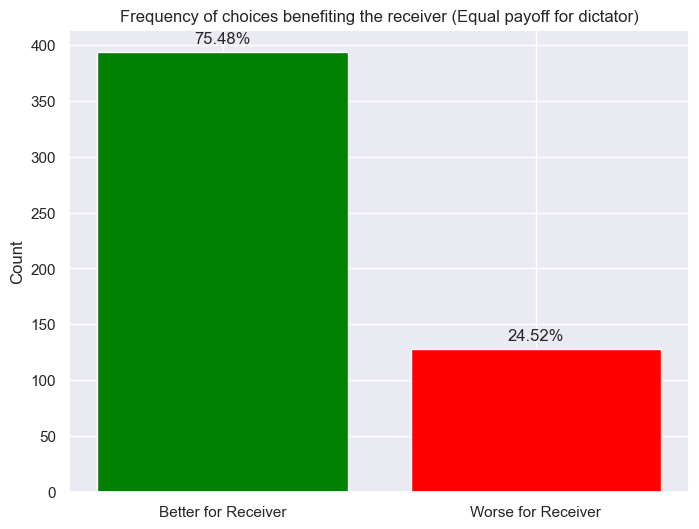

In [9]:
better_decision_count = equal_only_df_reduced[equal_only_df_reduced['receiver_profit_loss'] > 0].shape[0]
worse_decision_count = equal_only_df_reduced[equal_only_df_reduced['receiver_profit_loss'] <= 0].shape[0]
total_decisions = better_decision_count + worse_decision_count
better_decision_percentage = (better_decision_count / total_decisions) * 100
worse_decision_percentage = (worse_decision_count / total_decisions) * 100

labels = ['Better for Receiver', 'Worse for Receiver']
counts = [better_decision_count, worse_decision_count]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color=['green', 'red'])
for bar, percentage in zip(bars, [better_decision_percentage, worse_decision_percentage]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.2f}%', ha='center', va='bottom')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Frequency of choices benefiting the receiver (Equal payoff for dictator)')
plt.show()


### When the dictators payoff is equal for both decisions, ~75% of the decisions favored the better option for the receiver.

#### b)
Now also include the information on the subjects from the questionnaires in your plots. <br>
You can use any kind that you deem useful: histograms, line plots, etc.

# Prepare dataset

### Focus here is the highest paying (optimal) decision for the dictator since that appears to be the driving factor.

In [10]:
# How does the choices_df look atm?
choices_df

,sid,gid,order,self_x,self_y,other_x,other_y,choice_x,s_y,s_x,r_y,r_x,decision,dictator_payoff,receiver_payoff,dictator_delta,receiver_delta,best_option_chosen
0,102010050706,361,1,940,800,150,510,0,0,0,1,1,Worst,800,510,140,-360,0
1,102010050706,281,2,970,770,490,170,0,0,0,1,1,Worst,770,170,200,320,0
2,102010050706,391,3,1060,680,330,330,1,0,0,1,1,Best,1060,330,380,0,1
3,102010050706,271,4,990,750,480,180,1,0,0,1,1,Best,990,480,240,300,1
4,102010050706,311,5,930,810,510,150,0,0,0,1,1,Worst,810,150,120,360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,172010050704,251,35,780,420,540,660,1,1,0,0,1,Best,780,540,360,-120,1
6782,172010050704,191,36,680,520,780,420,0,0,1,1,0,Worst,520,420,160,360,0
6783,172010050704,221,37,620,580,410,790,1,1,0,0,1,Best,620,410,40,-380,1
6784,172010050704,231,38,670,530,420,780,1,1,0,0,1,Best,670,420,140,-360,1


In [11]:
merged_df_includes_missing_data = pd.merge(choices_df, subjects_df, on='sid', how='outer', indicator=True)
merged_df_includes_missing_data['missing_data'] = merged_df_includes_missing_data['_merge'] != 'both'
merged_df_cleaned = merged_df_includes_missing_data[merged_df_includes_missing_data['_merge'] == 'both']
merged_df_cleaned = merged_df_cleaned.drop(columns=['_merge', 'missing_data'])
merged_df_cleaned

,sid,gid,order,self_x,self_y,other_x,other_y,choice_x,s_y,s_x,...,bf_agreeableness,bf_neuroticism,cogabil,pe_D1_stud_natsci,pe_D1_stud_law,pe_D1_stud_socsci,pe_D1_stud_med,pe_monthinc,pe_age,pe_female
0,12010050501,121,1,510,150,810,930,1,1,1,...,11.0,-1.0,3.0,1.0,0.0,0.0,0.0,400.0,21.0,1.0
1,12010050501,341,2,870,870,140,520,1,0,0,...,11.0,-1.0,3.0,1.0,0.0,0.0,0.0,400.0,21.0,1.0
2,12010050501,291,3,890,850,520,140,1,0,0,...,11.0,-1.0,3.0,1.0,0.0,0.0,0.0,400.0,21.0,1.0
3,12010050501,101,4,400,260,690,1050,1,1,1,...,11.0,-1.0,3.0,1.0,0.0,0.0,0.0,400.0,21.0,1.0
4,12010050501,351,5,890,850,140,520,1,0,0,...,11.0,-1.0,3.0,1.0,0.0,0.0,0.0,400.0,21.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6742,352010050501,231,35,670,530,420,780,1,1,0,...,8.0,3.0,6.0,0.0,0.0,0.0,1.0,150.0,21.0,1.0
6743,352010050501,261,36,790,410,600,600,1,1,0,...,8.0,3.0,6.0,0.0,0.0,0.0,1.0,150.0,21.0,1.0
6744,352010050501,161,37,620,580,790,410,1,0,1,...,8.0,3.0,6.0,0.0,0.0,0.0,1.0,150.0,21.0,1.0
6745,352010050501,171,38,640,560,790,410,1,0,1,...,8.0,3.0,6.0,0.0,0.0,0.0,1.0,150.0,21.0,1.0


In [12]:
merged_df_cleaned = merged_df_cleaned.drop(['order', 'self_x', 'self_y', 'other_x', 'other_y'], axis=1)

# Encode decision column and further slimming down
label_encoder = LabelEncoder()
merged_df_cleaned['decision_encoded'] = label_encoder.fit_transform(merged_df_cleaned['decision'])
merged_df_encoded = merged_df_cleaned.drop(['decision', 'choice_x', 's_y', 's_x', 'r_y', 'r_x'], axis=1)

merged_df_encoded: Relies on previous transformations regarding making the best decision including deltas and payoffs

# Influence of Big 5 on optimal decision
optimal -> higher absolute payoff
        

non-optimal -> equal or lower payoff

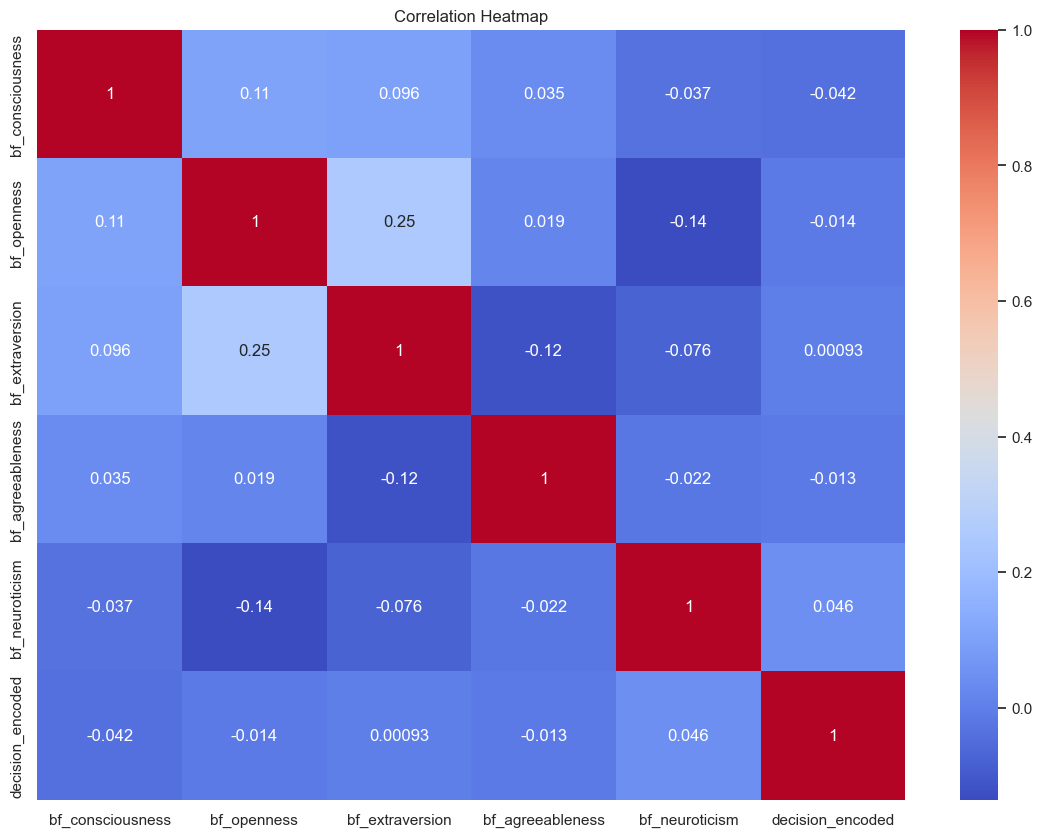

In [13]:
big_5_df_minimal = merged_df_encoded.drop(['sid','gid','dictator_payoff', 'receiver_payoff', 'dictator_delta', 'best_option_chosen', 'receiver_delta','cogabil','pe_D1_stud_natsci', 'pe_D1_stud_law', 'pe_D1_stud_socsci', 'pe_D1_stud_med', 'pe_monthinc', 'pe_age', 'pe_female'], axis=1)


plt.figure(figsize=(14, 10))
correlation_matrix = big_5_df_minimal.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### We can see that there are no significant relations between the Big 5 and the decision to take the better option (column on the right or last row). Especially extraversion appears to have no correlation to the decision to take the higher payoff.

# Decisions by biological gender (optimal and non-optimal)
optimal -> higher absolute payoff
        

non-optimal -> equal or lower payoff

The general distribution of genders in the dataset is as follows:
- Female (pe_female = 1): 3276 entries
- Male (pe_female = 0): 2964 entries
This indicates that the dataset contains slightly more females than males.



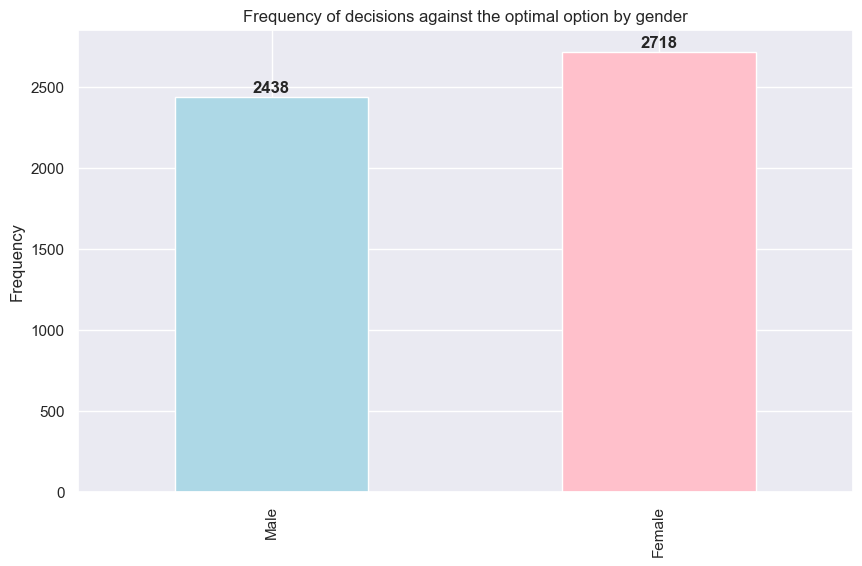

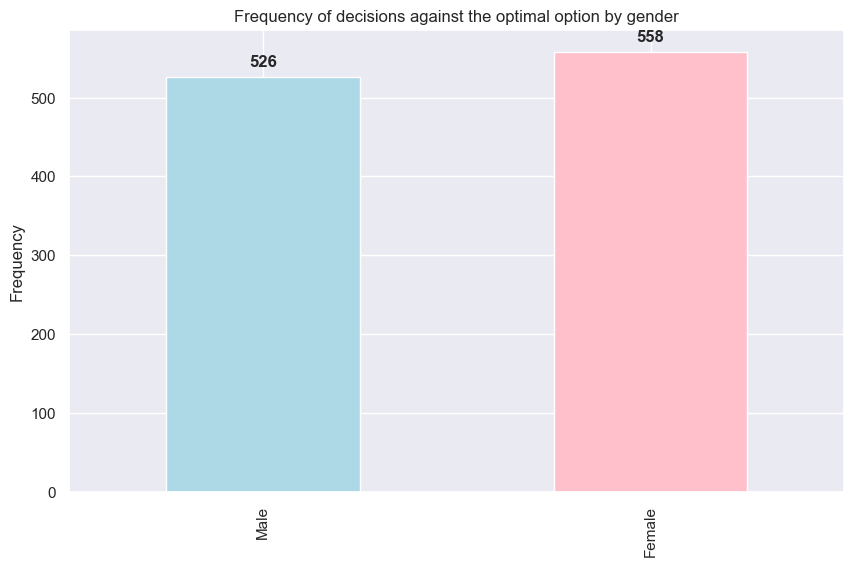

In [14]:
gender_distribution = merged_df_encoded['pe_female'].value_counts()
total_counts = merged_df_encoded['pe_female'].sum()

print(f"The general distribution of genders in the dataset is as follows:\n"
      f"- Female (pe_female = 1): {gender_distribution[1]} entries\n"
      f"- Male (pe_female = 0): {gender_distribution[0]} entries\n"
      f"This indicates that the dataset contains slightly more females than males.\n")

#Optimal and Non-optimal decisions by gender
#Optimal
decision_counts_positive = merged_df_encoded[merged_df_encoded['decision_encoded'] == 0].groupby('pe_female').size()

plt.figure(figsize=(10, 6))
ax = decision_counts_positive.plot(kind='bar', color=['LightBlue', 'pink'])
plt.title('Frequency of decisions against the optimal option by gender')
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
for i, count in enumerate(decision_counts_positive):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')
plt.show()

print("")
#Non-0ptimal
decision_counts_negative = merged_df_encoded[merged_df_encoded['decision_encoded'] != 0].groupby('pe_female').size()

plt.figure(figsize=(10, 6))
ax = decision_counts_negative.plot(kind='bar', color=['LightBlue', 'pink'])
plt.title('Frequency of decisions against the optimal option by gender')
plt.ylabel('Frequency')
plt.xlabel('')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
for i, count in enumerate(decision_counts_negative):
    ax.text(i, count + 10, str(count), ha='center', va='bottom', fontweight='bold')
plt.show()

### We can see that biological gender does not seem to affect the decisions a lot. There is a very slight tendency that female test subjects tend to decide against the best decision a little more often, but not by much.

# Decisions by Age (optimal and non-optimal)


### NOTE: The age group 20-25 has been split into 5 separate groups due to the high count of subjects in this range. This has to be kept in mind when looking at the graphs!

optimal -> higher absolute payoff
        
non-optimal -> equal or lower payoff

C:\Users\danny\AppData\Local\Temp\ipykernel_1700\2270337790.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decision_counts_age = merged_df_encoded[merged_df_encoded['decision_encoded'] == 0].groupby('age_group').size()


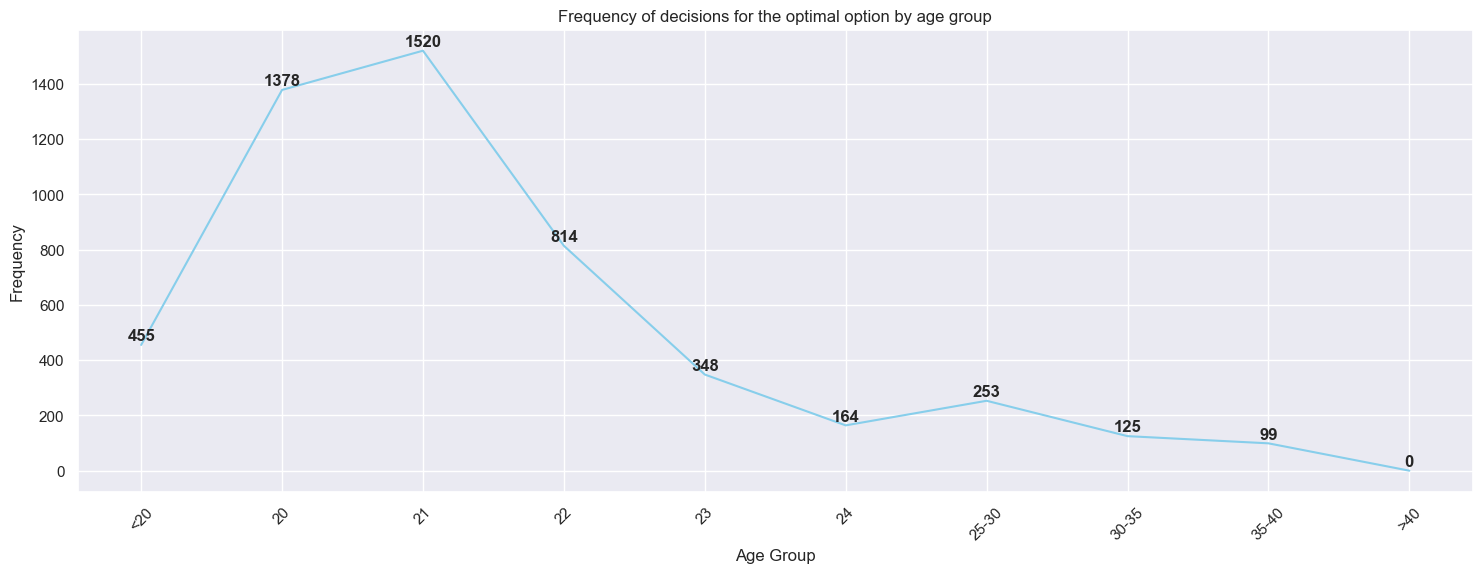

In [15]:
# Optimal decision
age_bins = [0, 20, 21, 22, 23, 24, 25, 30, 35, 40, 150]
age_labels = ['<20', '20', '21', '22', '23', '24', '25-30', '30-35', '35-40', '>40']
merged_df_encoded['age_group'] = pd.cut(merged_df_encoded['pe_age'], bins=age_bins, labels=age_labels, right=False)

decision_counts_age = merged_df_encoded[merged_df_encoded['decision_encoded'] == 0].groupby('age_group').size()

plt.figure(figsize=(18, 6))
ax = decision_counts_age.plot(kind='line', color='skyblue')
plt.title('Frequency of decisions for the optimal option by age group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
ax.set_xticks(range(len(age_labels)))
ax.set_xticklabels(age_labels)
for i, count in enumerate(decision_counts_age):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

C:\Users\danny\AppData\Local\Temp\ipykernel_1700\1757100043.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decision_counts_age = merged_df_encoded[merged_df_encoded['decision_encoded'] != 0].groupby('age_group').size()


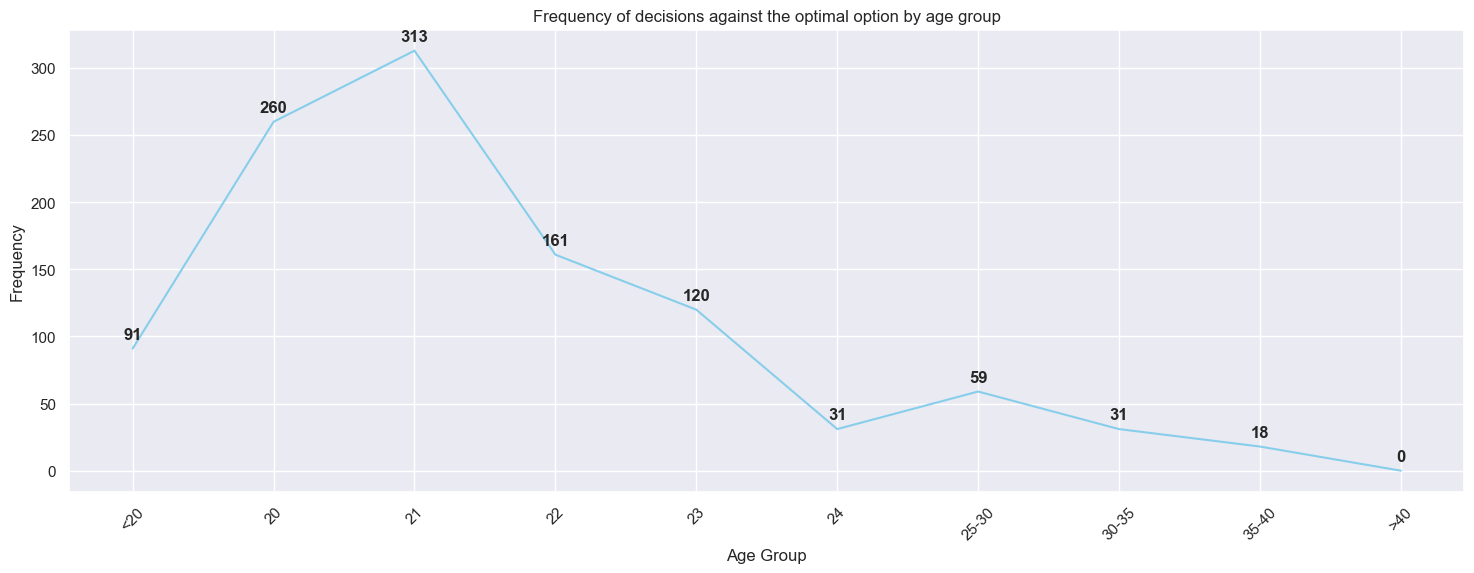

In [16]:
# Non-optimal decision
age_bins = [0, 20, 21, 22, 23, 24, 25, 30, 35, 40, 150]
age_labels = ['<20', '20', '21', '22', '23', '24', '25-30', '30-35', '35-40', '>40']
merged_df_encoded['age_group'] = pd.cut(merged_df_encoded['pe_age'], bins=age_bins, labels=age_labels, right=False)

decision_counts_age = merged_df_encoded[merged_df_encoded['decision_encoded'] != 0].groupby('age_group').size()

plt.figure(figsize=(18, 6))
ax = decision_counts_age.plot(kind='line', color='skyblue')
plt.title('Frequency of decisions against the optimal option by age group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
ax.set_xticks(range(len(age_labels)))
ax.set_xticklabels(age_labels)
for i, count in enumerate(decision_counts_age):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

plt.show()

merged_df_encoded = merged_df_encoded.drop(['age_group'], axis=1)

### The distributions for both optimal and non-optimal decisions are very similar. Only the age group of 23-year olds could be considered an "outlier", since there were mor epeople choosing the worse option in relation to the other age groups. Therefore, the age of the dictator also des not seem to influence the optimal decision.

# Decisions by study background (optimal or non-optimal)
optimal -> higher absolute payoff
        

non-optimal -> equal or lower payoff

The percentage of people from each area that decided on the optimal decision is as follows:
- pe_D1_stud_natsci: 82.55%
- pe_D1_stud_law: 84.38%
- pe_D1_stud_socsci: 82.50%
- pe_D1_stud_med: 85.38%


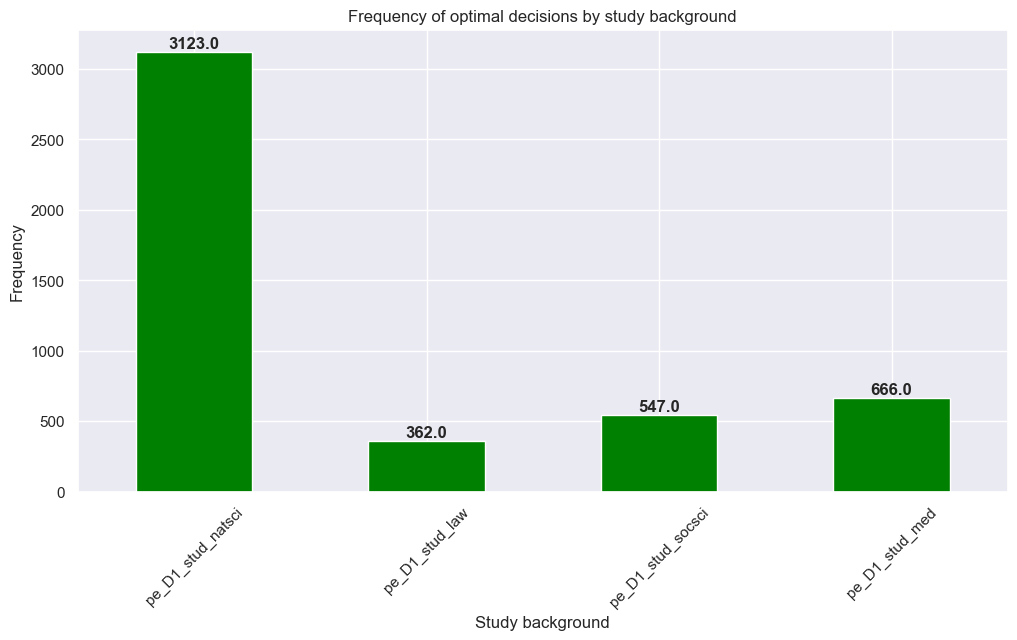

In [17]:
pe_D1_columns = [col for col in merged_df_encoded.columns if col.startswith('pe_D1_')]
best_decision_counts = merged_df_encoded[merged_df_encoded['decision_encoded'] == 0][pe_D1_columns].sum()

# Plotting the results
plt.figure(figsize=(12, 6))
ax = best_decision_counts.plot(kind='bar', color='green')
plt.title('Frequency of optimal decisions by study background')
plt.xlabel('Study background')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for i, count in enumerate(best_decision_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

# Calculating the percentage of people from each area that decided on the optimal decision
optimal_decisions = merged_df_encoded[merged_df_encoded['decision_encoded'] == 0][pe_D1_columns].sum()
total_counts = merged_df_encoded[pe_D1_columns].sum()
percentage_optimal_decisions = (optimal_decisions / total_counts) * 100
print(f"The percentage of people from each area that decided on the optimal decision is as follows:\n"
      f"- pe_D1_stud_natsci: {percentage_optimal_decisions['pe_D1_stud_natsci']:.2f}%\n"
      f"- pe_D1_stud_law: {percentage_optimal_decisions['pe_D1_stud_law']:.2f}%\n"
      f"- pe_D1_stud_socsci: {percentage_optimal_decisions['pe_D1_stud_socsci']:.2f}%\n"
      f"- pe_D1_stud_med: {percentage_optimal_decisions['pe_D1_stud_med']:.2f}%")


plt.show()


### When looking at the absolute numers, it appears that NatSci students take the best decisions the most. However, the relative numbers show that there is no (or a very weak (law and medicine tend to favor the better option a little bit more)) correlation between the study background and making the optimal decision for oneself.